In [204]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, \
                                    RandomizedSearchCV, \
                                    GridSearchCV, \
                                    cross_val_score, \
                                    KFold

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import  XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [205]:
# load in the various datasets
train = pd.read_csv("Train_Dataset.csv", index_col="Id")
test = pd.read_csv("Test_Dataset.csv")
submission = pd.read_csv("Sample Submission.csv")
train.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,,,,,,,,,,,,,,
16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [206]:
# inspecting the bottom five rows from the train set
train.tail()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,,,,,,,,,,,,,,
19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


In [207]:
# inspecting the datatype and potential missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7303 entries, 16167 to 15363
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       7303 non-null   int64  
 1   Sex       7303 non-null   int64  
 2   cp        7303 non-null   int64  
 3   trestbps  7303 non-null   int64  
 4   chol      7303 non-null   int64  
 5   fbs       7303 non-null   int64  
 6   restecg   7303 non-null   int64  
 7   thalach   7303 non-null   int64  
 8   exang     7303 non-null   int64  
 9   oldpeak   7303 non-null   float64
 10  slope     7303 non-null   int64  
 11  ca        7303 non-null   int64  
 12  thal      7303 non-null   int64  
 13  target    7303 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 855.8 KB


In [208]:
# runnning descriptive statistics
train.describe()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


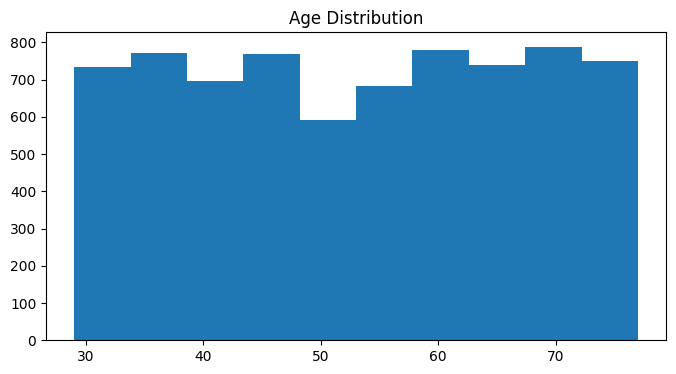

In [209]:
fig, ax = plt.subplots(figsize=(8, 4))
train['Age'].hist(ax=ax)
plt.grid(False)
plt.title("Age Distribution")
plt.show()

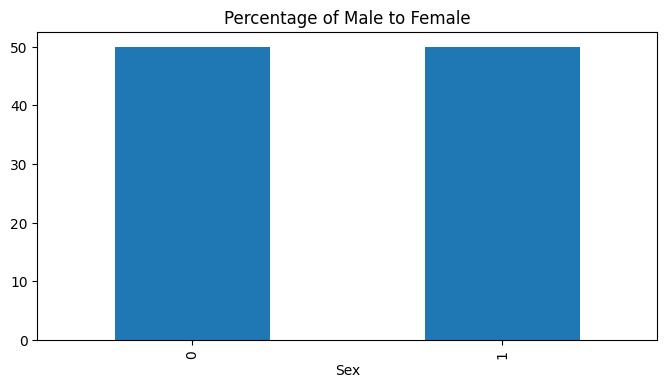

In [210]:
fig, ax = plt.subplots(figsize=(8, 4))
(train['Sex'].value_counts(normalize=True)*100).plot(kind='bar', ax=ax)
plt.title("Percentage of Male to Female")
plt.show()

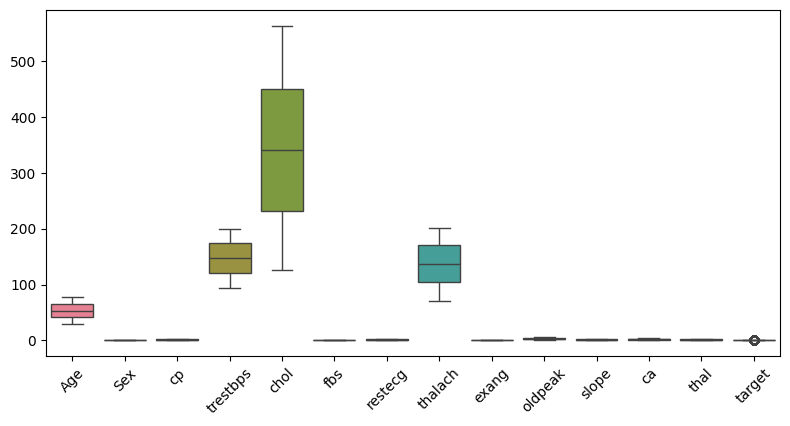

In [211]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=train, ax=ax)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

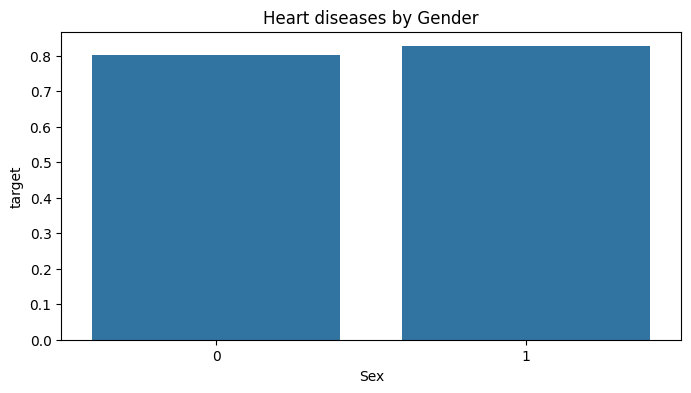

In [212]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=train, x="Sex", y="target", errorbar=('ci', False), ax=ax)
plt.title("Heart diseases by Gender")
plt.show()

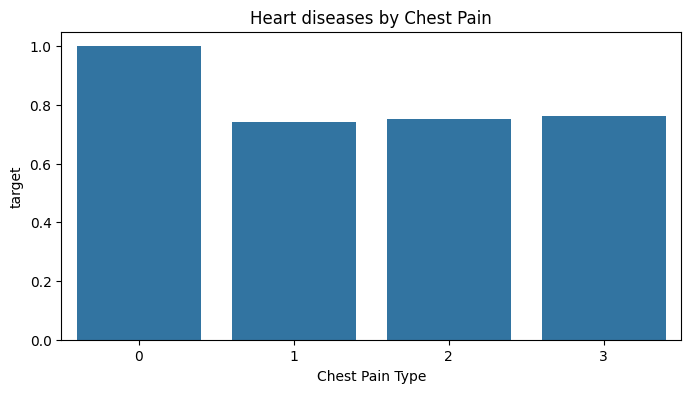

In [213]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=train, x="cp", y="target", errorbar=('ci', False), ax=ax)
plt.xlabel("Chest Pain Type")
#plt.xticks([0, 1, 2, 3], ["No Chest Pain", "Non-cardiac", "Atypical Angina", "Typical Angina"])
plt.title("Heart diseases by Chest Pain")
plt.show()

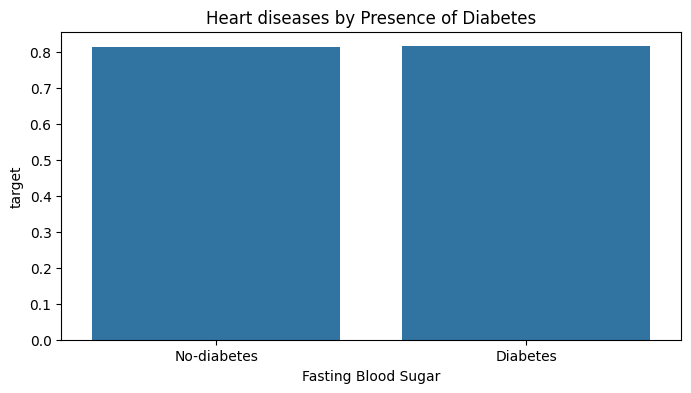

In [214]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=train, x="fbs", y="target", errorbar=('ci', False), ax=ax)
plt.xlabel("Fasting Blood Sugar")
plt.xticks([0, 1], ["No-diabetes", "Diabetes"])
plt.title("Heart diseases by Presence of Diabetes")
plt.show()

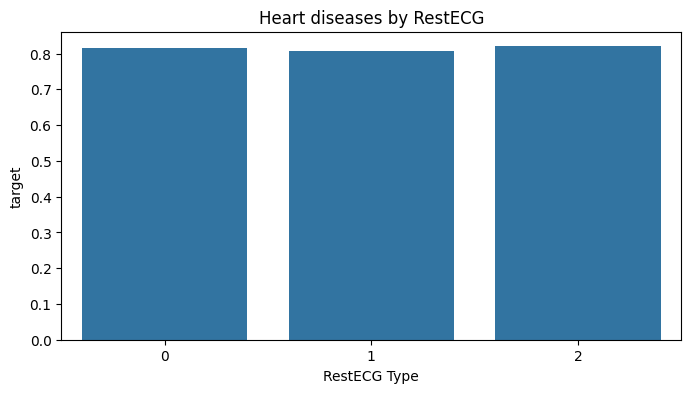

In [215]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=train, x="restecg", y="target", errorbar=('ci', False), ax=ax)
plt.xlabel("RestECG Type")
plt.title("Heart diseases by RestECG")
plt.show()

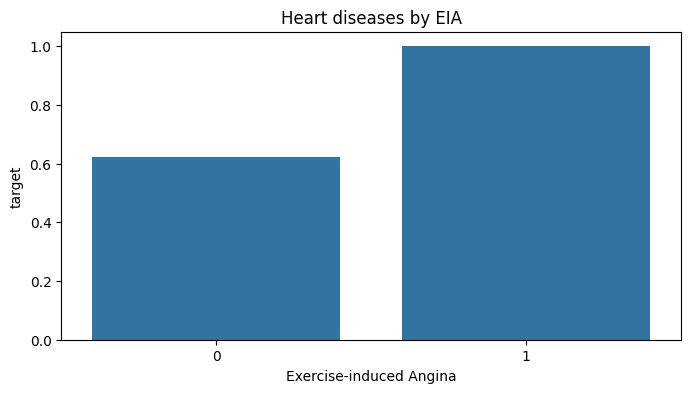

In [216]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=train, x="exang", y="target", errorbar=('ci', False), ax=ax)
plt.xlabel("Exercise-induced Angina")
plt.title("Heart diseases by EIA")
plt.show()

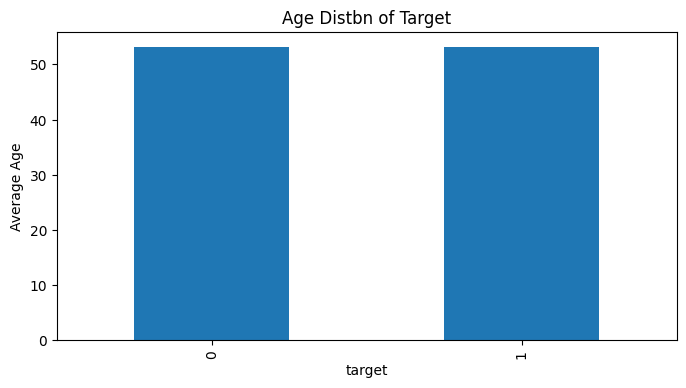

In [217]:
fig, ax = plt.subplots(figsize=(8, 4))
train.groupby("target")['Age'].mean().plot(kind='bar', ax=ax)
plt.ylabel("Average Age")
plt.title("Age Distbn of Target")
plt.grid(False)
plt.show()

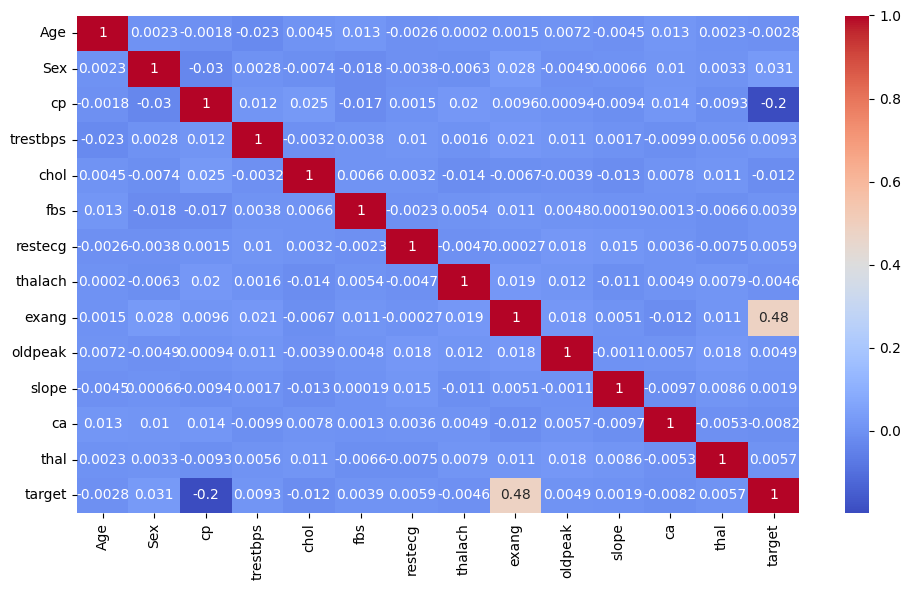

In [218]:
fig, ax = plt.subplots(figsize=(10, 6))
correl = train.corr()
sns.heatmap(correl, annot=True, cmap="coolwarm", ax=ax)
plt.tight_layout()
plt.show()

In [219]:
train['target'].value_counts(normalize=True)*100

target
1    81.35013
0    18.64987
Name: proportion, dtype: float64

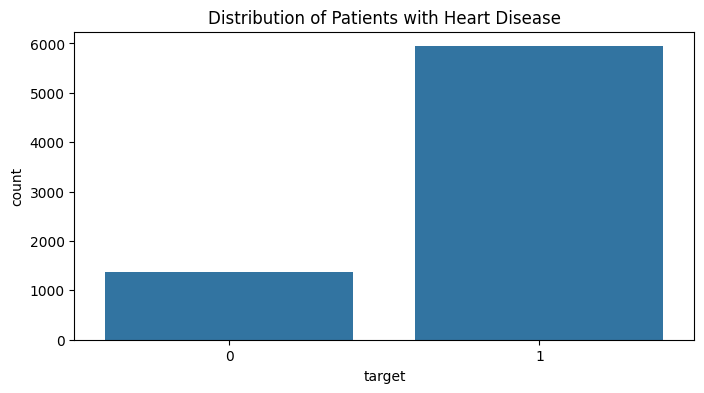

In [220]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(train, x="target", ax=ax)
plt.title("Distribution of Patients with Heart Disease")
plt.grid(False)
plt.show()

##### Unarguably, there is an obvious imbalance on our `target` column which we need to address 

In [221]:
# Instantiate the models

logistic = LogisticRegression(n_jobs=11, random_state=11)
forest = RandomForestClassifier(n_estimators=5, n_jobs=10, random_state=11)
xgboost = XGBClassifier()
catboost = CatBoostClassifier(learning_rate=.9)
scaler = StandardScaler()
kfold = KFold(n_splits=5, shuffle=True)

In [222]:
# dividing the data into features and targets
X = train.drop(columns="target", axis=1)
y = train["target"]

In [223]:
"""X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X"""

'X_scaled = scaler.fit_transform(X)\nX = pd.DataFrame(X_scaled, columns=X.columns)\nX'

In [224]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=11)

In [225]:
X_train.shape

(5842, 13)

##### Before we proceed further, we need to address the class imbalance earlier observed on the `target` column
##### We will do this by Upsampling

In [226]:
# Combine the X_train and y_train to make resampling easier
train_data = pd.concat([X_train, y_train], axis=1)

# Filter for majority and minority classes
majority_class = train_data[train_data['target'] == 1]  
minority_class = train_data[train_data['target'] == 0]  

# Upsample the minority class
minority_class_upsampled = resample(minority_class,
                                    replace=True,  # Sample with replacement
                                    n_samples=len(majority_class),  # Match majority class size
                                    random_state=11)  # Reproducibility

# Combine the upsampled minority class with the original majority class
upsampled_train_data = pd.concat([majority_class, minority_class_upsampled])

# Separate the features and target again
X_train = upsampled_train_data.drop('target', axis=1)
y_train = upsampled_train_data['target']

upsampled_train_data['target'].value_counts(normalize=True) * 100

target
1    50.0
0    50.0
Name: proportion, dtype: float64

In [227]:
X_train.dropna(axis=0, inplace=True)
y_train.dropna(axis=0, inplace=True)

In [228]:
# fitting and evaluating the Logistic Regression model
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_test)
logistic_ = metrics.classification_report(y_test, logistic_pred)
accuracy = metrics.accuracy_score(y_test, logistic_pred)
print("Logistic Regression:")
print(f"Accuracy score: {accuracy}")
print(f": {logistic_}")


Logistic Regression:
Accuracy score: 0.8151950718685832
:               precision    recall  f1-score   support

           0       0.50      1.00      0.67       270
           1       1.00      0.77      0.87      1191

    accuracy                           0.82      1461
   macro avg       0.75      0.89      0.77      1461
weighted avg       0.91      0.82      0.83      1461



In [229]:
cv_score = (cross_val_score(logistics, X_train, y_train, scoring="accuracy", cv=kfold))*100
cv_score

array([87.89473684, 86.15789474, 86.73684211, 89.63157895, 88.57894737])

In [230]:
# Random Forest
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_ = metrics.classification_report(y_test, forest_pred)
accuracy = metrics.accuracy_score(y_test, forest_pred)
print("Random Forest:")
print(f"Accuracy score: {accuracy}")
print(f": {forest_}")

Random Forest:
Accuracy score: 0.813141683778234
:               precision    recall  f1-score   support

           0       0.50      0.56      0.53       270
           1       0.90      0.87      0.88      1191

    accuracy                           0.81      1461
   macro avg       0.70      0.72      0.71      1461
weighted avg       0.82      0.81      0.82      1461



In [231]:
cv_score = (cross_val_score(forest, X_train, y_train, scoring="accuracy", cv=kfold))*100
cv_score

array([91.15789474, 91.26315789, 91.63157895, 92.05263158, 91.36842105])

In [232]:
%%time

params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


grid_for = GridSearchCV(estimator=forest, param_grid=params, cv=kfold, scoring="accuracy")
grid_for.fit(X_train, y_train)
#grid_pred = grid.predict(X_test)
grid_for.best_score_

CPU times: total: 9min 11s
Wall time: 4min 57s


0.9248421052631579

In [233]:
grid_for.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=10,
                       n_jobs=10, random_state=11)

In [234]:
griddy_pred = grid_for.best_estimator_.predict(X_test)
griddy_score = grid_for.score(X_test, y_test)
griddy_score

0.8240930869267625

In [235]:
%%time

param_dist = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_cv = RandomizedSearchCV(forest, n_iter=10, param_distributions=param_dist, scoring="accuracy", cv=kfold, random_state=11)
random_cv.fit(X_train, y_train)
#rand_cv = random.score(X_test)
random_cv.best_score_

CPU times: total: 48.2 s
Wall time: 23 s


0.906

In [236]:
griddy_pred = random_cv.best_estimator_.predict(X_test)
griddy_score = random_cv.best_estimator_.score(X_test, y_test)
griddy_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [237]:
bestie = random_cv.best_estimator_
bestie

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_jobs=10, random_state=11)

In [238]:
#forest 
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_ = metrics.classification_report(y_test, forest_pred)
print("Random Forest:")
print(f"Report: {forest_}")

Random Forest:
Report:               precision    recall  f1-score   support

           0       0.50      0.56      0.53       270
           1       0.90      0.87      0.88      1191

    accuracy                           0.81      1461
   macro avg       0.70      0.72      0.71      1461
weighted avg       0.82      0.81      0.82      1461



In [239]:
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
xgboost_ = metrics.classification_report(y_test, xgboost_pred)
accuracy = metrics.accuracy_score(y_test, xgboost_pred)
print("XGBoost:")
print(f"Accuracy score: {accuracy}")
print(f"Report: {xgboost_}")

XGBoost:
Accuracy score: 0.8206707734428473
Report:               precision    recall  f1-score   support

           0       0.51      0.73      0.60       270
           1       0.93      0.84      0.88      1191

    accuracy                           0.82      1461
   macro avg       0.72      0.78      0.74      1461
weighted avg       0.85      0.82      0.83      1461



In [240]:
adaboost = AdaBoostClassifier(estimator=forest)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)
adaboost_ = metrics.classification_report(y_test, adaboost_pred)
accuracy = metrics.accuracy_score(y_test, adaboost_pred)
print("XGBoost:")
print(f"Accuracy score: {accuracy}")
print(f"Report: {adaboost_}")

XGBoost:
Accuracy score: 0.8056125941136209
Report:               precision    recall  f1-score   support

           0       0.41      0.11      0.17       270
           1       0.83      0.96      0.89      1191

    accuracy                           0.81      1461
   macro avg       0.62      0.54      0.53      1461
weighted avg       0.75      0.81      0.76      1461



In [241]:
catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)
catboost_ = metrics.classification_report(y_test, catboost_pred)
accuracy = metrics.accuracy_score(y_test, catboost_pred)
print("CatBoost:")
print(f"Accuracy score: {accuracy}")
print(f"Report: {catboost_}")

0:	learn: 0.3032374	total: 36.7ms	remaining: 36.6s
1:	learn: 0.2948057	total: 50.6ms	remaining: 25.3s
2:	learn: 0.2856322	total: 61ms	remaining: 20.3s
3:	learn: 0.2791308	total: 69.3ms	remaining: 17.3s
4:	learn: 0.2709613	total: 79ms	remaining: 15.7s
5:	learn: 0.2659515	total: 86.9ms	remaining: 14.4s
6:	learn: 0.2610908	total: 96.8ms	remaining: 13.7s
7:	learn: 0.2565109	total: 106ms	remaining: 13.1s
8:	learn: 0.2528113	total: 116ms	remaining: 12.8s
9:	learn: 0.2472573	total: 126ms	remaining: 12.5s
10:	learn: 0.2435784	total: 134ms	remaining: 12.1s
11:	learn: 0.2396914	total: 145ms	remaining: 11.9s
12:	learn: 0.2363429	total: 153ms	remaining: 11.6s
13:	learn: 0.2320752	total: 163ms	remaining: 11.4s
14:	learn: 0.2280228	total: 171ms	remaining: 11.2s
15:	learn: 0.2242263	total: 182ms	remaining: 11.2s
16:	learn: 0.2197225	total: 193ms	remaining: 11.2s
17:	learn: 0.2136855	total: 200ms	remaining: 10.9s
18:	learn: 0.2104351	total: 210ms	remaining: 10.9s
19:	learn: 0.2061551	total: 218ms	rema

In [242]:
test = pd.read_csv("Test_Dataset.csv", index_col="id")
test.columns


Index(['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [249]:
test_predictions = xgboost.predict(test)
test_predictions

array([1, 1, 1, ..., 1, 1, 0])

In [250]:
predictions = pd.DataFrame({"id": submission['Id'], "target": test_predictions})
predictions

,id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0
...,...,...
2692,14964,0
2693,16774,1
2694,18884,1
2695,10000,1


In [251]:
predictions.to_csv("Predictions.csv", index=False)

In [252]:
import pickle
with open ("forest.pkl", "wb") as file:
    model = pickle.dump(forest, file)

In [253]:
with open ('forest.pkl', 'rb') as f:
    model = pickle.load(f)

In [254]:
model.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)